# Model Evaluation

In [1]:
# ensure model loaded properly
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup 
from PIL import Image
from nltk import word_tokenize
import re

# transfer learning model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.preprocessing import sequence, image 

# progress bars
from alive_progress import alive_bar; import time

# serialization
import pickle 

# deep learning model
from keras import Input, layers, optimizers
from keras.layers import LSTM, Embedding, Dense, Activation, Flatten, Reshape, Dropout
from keras.layers.merge import add
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
# load encoded test images
with open('cloud_files/test_encoded.pickle', 'rb') as f:
    test_encoded = pickle.load(f)

In [3]:
# load test image
test_img = '4950994410.jpg'
image = test_encoded[test_img].reshape((1,2048))

In [4]:
# set img_path
img_path = '/Users/addingtongraham/Documents/datasets/Flickr30K/flickr30k_images/'

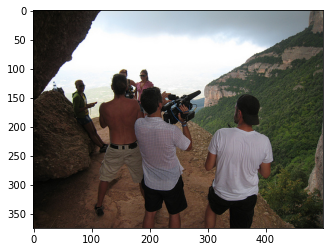

In [5]:
# print image
X = plt.imread(img_path+test_img)
plt.imshow(X)
plt.show()

In [6]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break

    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [7]:
# load word_to_idx and idx_to_word
with open('cloud_files/word_to_idx.pickle', 'rb') as f:
    word_to_idx = pickle.load(f)

with open('cloud_files/idx_to_word.pickle', 'rb') as f:
    idx_to_word = pickle.load(f)


In [8]:
# load model
from keras.models import load_model
model = load_model('cloud_trained_model.h5')

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-23 17:22:04.243234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-23 17:22:04.243338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# test model
max_length = 80
print('Greedy Search:', greedySearch(image))

2022-04-23 17:22:05.652824: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-23 17:22:06.164534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-23 17:22:06.292445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Greedy Search: a man in a red shirt and a woman in a red shirt are walking down a path
